In [1]:
from __future__ import division
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            ax.spines['left'].set_color('none')
            ax.spines['bottom'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

In [2]:
sqlitefile = 'C:/Users/jeroe/Documents/reddit statistics/reddit.sqlite'

# Get all gilded submissions

In [7]:
%%time
conn = sqlite3.connect(sqlitefile)
c = conn.cursor()
c.execute('''SELECT subreddit, gilded, author, score FROM submissions WHERE gilded > 0''')
rows = c.fetchall()
conn.close()

Wall time: 32min 55s


In [8]:
len(rows)

54324

In [10]:
import pickle
with open('gilded_submissions.p', 'wb') as f:
    pickle.dump(rows, f)

In [18]:
import numpy as np

In [19]:
rows = np.array(rows)

In [32]:
hist = {}
for r in rows[:,0]:
    try:
        hist[r] += 1
    except KeyError:
        hist[r] = 1

In [58]:
sorted_subreddits = np.array(hist.keys())[np.array(hist.values()).argsort()[::-1]]

In [59]:
sorted_subreddits[:10]

array([u'gonewild', u'pics', u'funny', u'AskReddit', u'AdviceAnimals',
       u'pcmasterrace', u'DestinyTheGame', u'tifu', u'videos',
       u'leagueoflegends'], dtype=object)

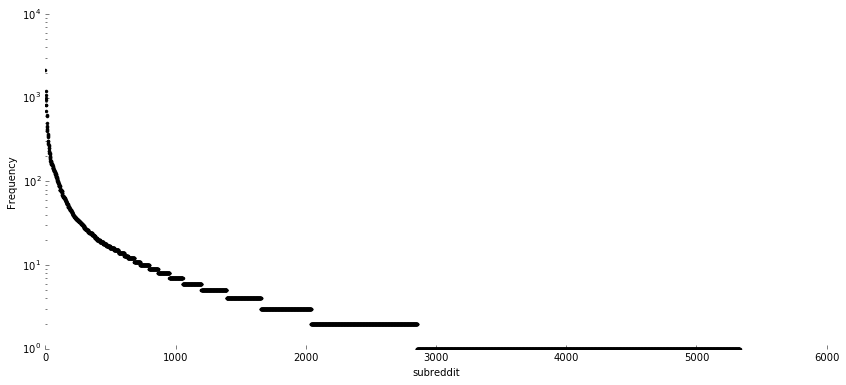

In [55]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(sorted(hist.values(), reverse=True), '.', c='black')
ax.set_ylabel('Frequency')
ax.set_xlabel('subreddit')
ax.set_yscale('log')
# ax.set_xscale('log')
hide_spines()
plt.show()

# Count submissions per subreddit

In [ ]:
%%time
conn = sqlite3.connect(sqlitefile)
c = conn.cursor()
c.execute('''SELECT subreddit, count(*) FROM submissions GROUP BY subreddit;''')
counts = c.fetchall()
conn.close()

In [ ]:
import pickle
with open('posts_per_subreddit.p', 'wb') as f:
    pickle.dump(counts, f)

# Timeline of submissions

In [27]:
%%time
conn = sqlite3.connect(sqlitefile)
c = conn.cursor()
c.execute('''SELECT created_UTC FROM submissions WHERE subreddit = 'aww' ''')
times_aww = c.fetchall()
conn.close()

Wall time: 28min 57s


In [39]:
min([min(times_aww), min(times_pics)])

(1201223694,)

In [40]:
def per_day(rows, start):
    days = []
    prev_time = start
    counter = 1
    for x in rows:
        x = x[0]
        counter += 1
        if x - prev_time > 60*60*24: # 24 hours
            days.append(counter)
            prev_time = x
            counter = 0
    return days

In [42]:
days_aww = per_day(times_aww, 1201223694)
days_pics = per_day(times_pics, 1201223694)

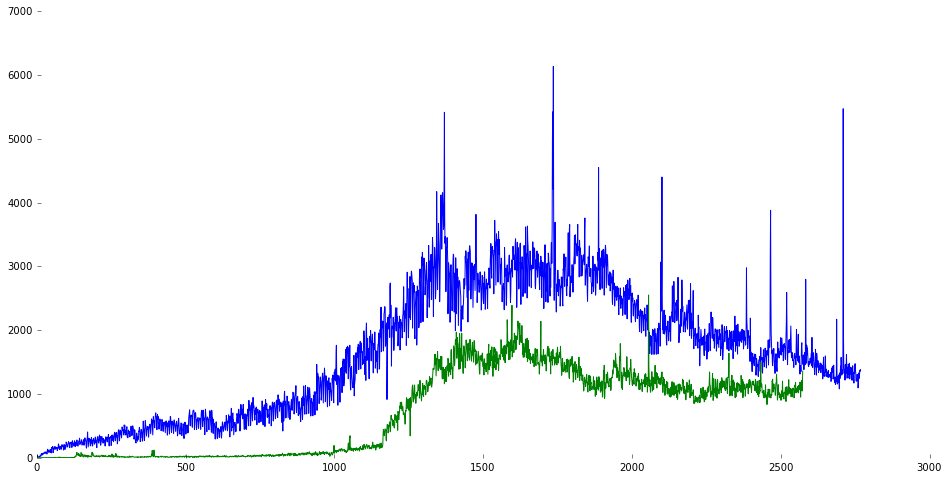

In [43]:
plt.figure(figsize=(16,8))
plt.plot(days_pics)
plt.plot(days_aww)
hide_spines()
plt.show()